In [5]:
#로컬 파일 읽기
import pandas as pd

ownership = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/S&P data/ownership.parquet'
professional = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/S&P data/professional.parquet'
keydev = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/S&P data/keydev.parquet'
exchangerate = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/S&P data/exchangerate.parquet'
estimates = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/S&P data/estimates.parquet'
company = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/S&P data/company.parquet'
transcript = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/S&P data/transcript.parquet'
financial = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/S&P data/financials.parquet'
market = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/S&P data/market.parquet'

In [1]:
from sqlalchemy import create_engine

user = 'felab'
password = 'rlawkdgh'
host = '192.168.0.2'
port = 3306
database = 'db'

# 데이터베이스 엔진을 생성합니다.
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

# 엔진을 사용하여 데이터베이스 내의 모든 테이블 이름을 조회합니다.
table_list = engine.table_names()

# 테이블 리스트를 출력합니다.
print(table_list)


/var/folders/vk/4yxtbn3d26j6dby6kfglqvbr0000gp/T/ipykernel_23113/3892218085.py:13: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  table_list = engine.table_names()


['company', 'estimates', 'exchangerate', 'keydev', 'market', 'ownership', 'professional', 'test', 'transcript', 'transcript1', 'transcript2']


In [3]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd

user = 'felab'
password = 'rlawkdgh'
host = '192.168.0.2'  # 포트 번호를 여기에 포함하지 않습니다.
port = 3306  # 포트 번호를 별도의 변수로 설정합니다.
database = 'db'
table_name = 'company' #읽고 싶은 데이터셋.

# SQLAlchemy 엔진 생성 시 호스트와 포트를 정확하게 지정합니다.
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

# pymysql 연결 시에도 마찬가지로 호스트와 포트를 정확하게 지정합니다.
connection = pymysql.connect(host=host, port=port, user=user, password=password, database=database)

query = f"SELECT simpleIndustryDescription FROM {table_name}" # 원하는 쿼리. SQL 지식 필요함
df = pd.read_sql(query, engine)
df

,simpleIndustryDescription
0,Capital Markets
1,Capital Markets
2,Capital Markets
3,Capital Markets
4,Capital Markets
...,...
7140,Media
7141,Software
7142,Health Care Providers and Services
7143,Media


In [6]:
#pd.read_parquet(ownership)
#pd.read_parquet(professional)
#pd.read_parquet(keydev)
#pd.read_parquet(exchangerate)
#pd.read_parquet(estimates)
pd.read_parquet(company)
#pd.read_parquet(transcript)
#pd.read_parquet(market)

,companyId,companyName,streetAddress,country,officePhoneValue,officeFaxValue,webPage,tickerSymbol,yearFounded,simpleIndustryDescription,companyTypeName,longBusinessDescription,competitorNames
0,18493,DC Venture Partners,1103 Riverbend Club Drive,United States,770-612-9190,None,None,None,1998,Capital Markets,Private Investment Firm,None,None
1,18495,13i Capital Corporation,2021 Midwest Road,United States,630-620-2255,800-849-4183,www.13icapital.com,None,1993,Capital Markets,Private Investment Firm,None,None
2,18499,21 International Holdings Inc.,None,United States,None,None,None,None,None,Capital Markets,Private Investment Firm,None,None
3,18501,21 Invest Sgr S.p.A.,"Viale G. Felissent, 90",Italy,39 0422 31 66 11,39 0422 31 66 00,www.21investimenti.com,None,1992,Capital Markets,Private Investment Firm,None,None
4,18505,Palo Alto Venture Partners,555 Bryant Street,United States,650-462-1221,650-462-1227,None,None,1996,Capital Markets,Private Investment Firm,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30875647,2147482609,Las Machicas S.A.,Ctra. Comarcal 413 Km 164,Spain,None,None,None,None,None,None,Private Company,None,None
30875648,2147483010,Shenzhen Bainianhong Decoration Design Enginee...,"4b, Building C, Yangji Xintiandi, Nanwan Sub-D...",China,None,None,www.bh900.com,None,2012,Construction and Engineering,Private Company,None,None
30875649,2147483133,"Shenzhen Bosikang Automation Technology Co.,Ltd.","West Zone, Floor 3, No.7, Liangong Road, Sanli...",China,None,None,None,None,2013,Trading Companies and Distributors,Private Company,None,None
30875650,2147483188,Fianteira Turismo SL,C/ Orense - Edificio Mourigada 24 Bajo 12,Spain,None,None,www.fianteiraturismo.com,None,None,None,Private Company,None,None


Financial, transcript, Market은 메모리 문제로 따로 처리함

In [1]:
#상장사만 남기고 나머지 제거

import pandas as pd

company_path = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/S&P data/company.parquet'
company_df = pd.read_parquet(company_path)

#비상장사 제거
filtered_company_df = company_df[company_df['tickerSymbol'].notnull()]

selected_columns = filtered_company_df[['tickerSymbol', 'simpleIndustryDescription']]

print(selected_columns)


         tickerSymbol simpleIndustryDescription
5               MMINV           Capital Markets
7                 III           Capital Markets
14               ABBN      Electrical Equipment
70                ALB                 Chemicals
86                ALL                 Insurance
...               ...                       ...
30867885      A465780           Capital Markets
30867925       159538           Capital Markets
30869103       159535           Capital Markets
30869251       560590           Capital Markets
30870524         7648                      None

[250131 rows x 2 columns]


In [2]:
# 산업군 수 파악
unique_industry_count = filtered_company_df['simpleIndustryDescription'].nunique()

print(unique_industry_count)

74


In [3]:
#산업군 종류 파악
unique_industries = filtered_company_df['simpleIndustryDescription'].unique()

print(unique_industries)

['Capital Markets' 'Electrical Equipment' 'Chemicals' 'Insurance'
 'Broadline Retail' 'Financial Services'
 'Diversified Telecommunication Services' 'Metals and Mining'
 'Energy Equipment and Services' 'Banks'
 'Health Care Equipment and Supplies' 'IT Services'
 'Trading Companies and Distributors' 'Media' 'Communications Equipment'
 'Professional Services' 'Pharmaceuticals'
 'Electronic Equipment, Instruments and Components'
 'Mortgage Real Estate Investment Trusts (REITs)'
 'Textiles, Apparel and Luxury Goods' 'Specialty Retail'
 'Semiconductors and Semiconductor Equipment' 'Software'
 'Air Freight and Logistics' 'Interactive Media and Services'
 'Life Sciences Tools and Services' 'Consumer Finance'
 'Oil, Gas and Consumable Fuels' 'Health Care Providers and Services'
 'Consumer Staples Distribution and Retail'
 'Real Estate Management and Development' 'Industrial Conglomerates'
 'Wireless Telecommunication Services' 'Household Durables'
 'Construction Materials' 'Machinery' 'Aerospa

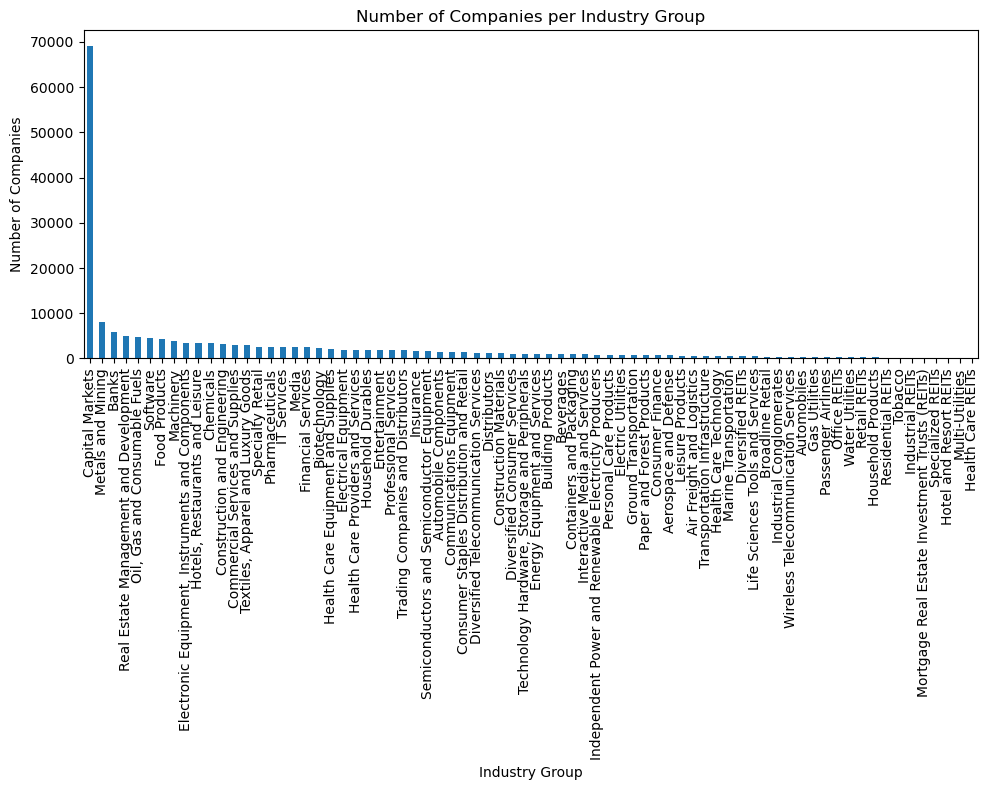

In [7]:
#산업군별 회사 수 시각화

import matplotlib.pyplot as plt

industry_counts = filtered_company_df['simpleIndustryDescription'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))  
industry_counts.plot(kind='bar')
plt.title('Number of Companies per Industry Group')
plt.xlabel('Industry Group')
plt.ylabel('Number of Companies')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()
